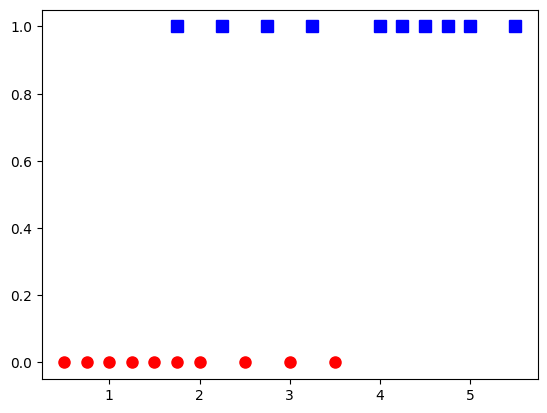

In [14]:
# Imports
from __future__ import division, print_function, unicode_literals
from logr_utils import sigmoid, logistic_sigmoid_regression

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])

y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]

X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [15]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

print(sigmoid(np.dot(w[-1].T, X)))

[[-4.092695  ]
 [ 1.55277242]]
[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


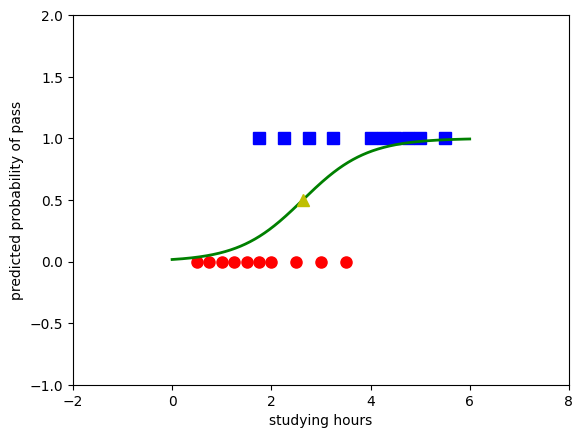

In [16]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

Predicted probabilities for new study hours:
Study hours: 2.45, Predicted pass probability: 0.4284
Study hours: 1.85, Predicted pass probability: 0.2279
Study hours: 3.75, Predicted pass probability: 0.8494
Study hours: 3.21, Predicted pass probability: 0.7092
Study hours: 4.05, Predicted pass probability: 0.8999


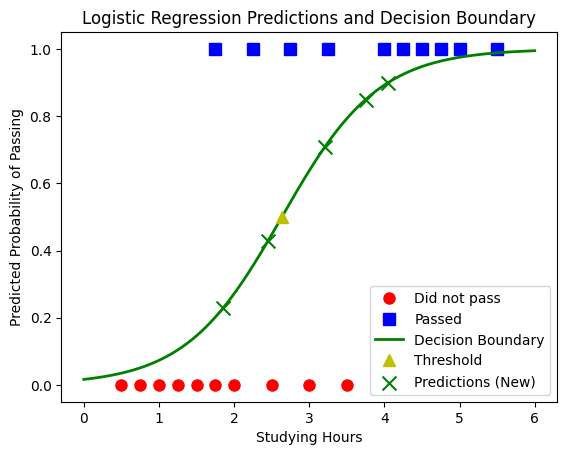

In [17]:
# New study hours for prediction
new_study_hours = np.array([2.45, 1.85, 3.75, 3.21, 4.05])

# Add a column of 1s (intercept term) to the new data
X_new = np.concatenate((np.ones((1, new_study_hours.shape[0])), new_study_hours.reshape(1, -1)), axis=0)

# Predict the probability for each new study hour using the trained model
pred_prob_new = sigmoid(np.dot(w[-1].T, X_new))

# Print the predicted probabilities
print("Predicted probabilities for new study hours:")
for hour, prob in zip(new_study_hours, pred_prob_new[0]):
    print(f"Study hours: {hour:.2f}, Predicted pass probability: {prob:.4f}")

# Plot original data points
plt.plot(X0, y0, 'ro', markersize=8, label='Did not pass')
plt.plot(X1, y1, 'bs', markersize=8, label='Passed')

# Plot the decision boundary
xx = np.linspace(0, 6, 1000)
yy = sigmoid(w0 + w1 * xx)
plt.plot(xx, yy, 'g-', linewidth=2, label='Decision Boundary')

# Plot threshold point
plt.plot(threshold, 0.5, 'y^', markersize=8, label='Threshold')

# Plot new predicted study hours as green 'X'
plt.scatter(new_study_hours, pred_prob_new, color='green', marker='x', s=100, label='Predictions (New)')

# Set plot labels and title
plt.xlabel('Studying Hours')
plt.ylabel('Predicted Probability of Passing')
plt.legend()
plt.title('Logistic Regression Predictions and Decision Boundary')

# Show the plot
plt.show()